# Titanic 

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [276]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Überblick


##  Fehlende Informationen (Missing Values)

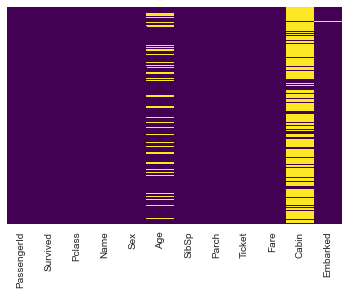

In [223]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Age und Cabin haben die meisten fehlenden Daten 

In [224]:
for feature in df_train.columns:
    print('{}: {}'.format(feature, df_train[feature].isnull().sum()))

PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2


### Data Visualisierung: Erster Überblick


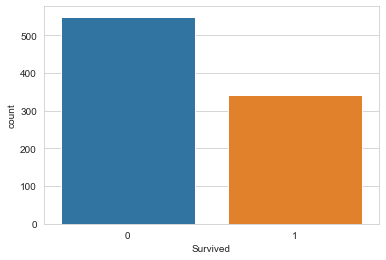

In [225]:
sns.set_style(style='whitegrid')
sns.countplot(x='Survived', data = df_train)

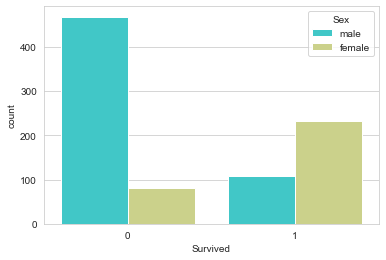

In [226]:
sns.set_style(style='whitegrid')
sns.countplot(x='Survived', hue = 'Sex', data = df_train, palette='rainbow')


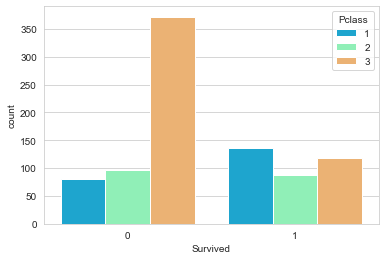

In [227]:
sns.set_style(style='whitegrid')
sns.countplot(x='Survived', hue = 'Pclass', data = df_train, palette='rainbow')

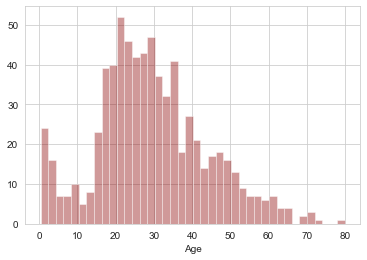

In [228]:
sns.distplot(df_train['Age'].dropna(), kde=False, color='darkred', bins=40)

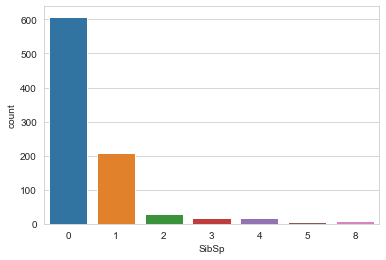

In [229]:
sns.countplot(x='SibSp', data=df_train)

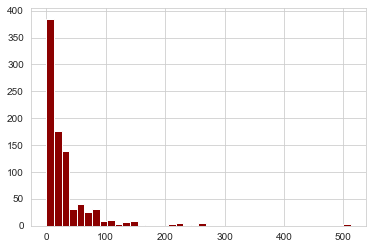

In [230]:
df_train['Fare'].hist(color='darkred', bins=40)

## Erster Überblick: Abgeschlossen 
###  2. Datenbereinigung (Data Cleaning)

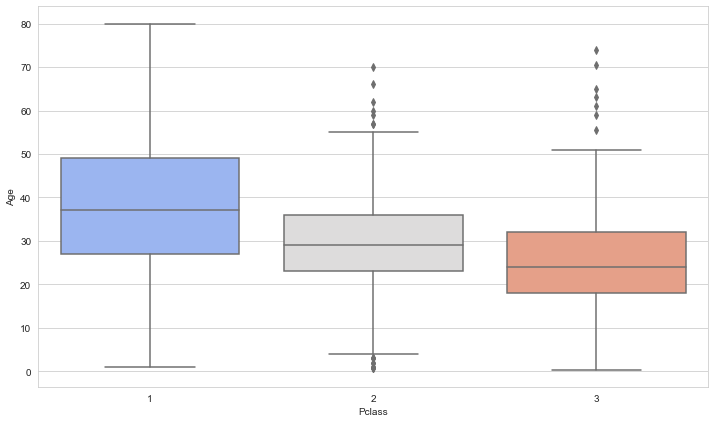

In [231]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=df_train, palette='coolwarm')


In [232]:
Age_Pclass1 = df_train[df_train['Pclass']==1]['Age'].mean()
Age_Pclass2 = df_train[df_train['Pclass']==2]['Age'].mean()
Age_Pclass3 = df_train[df_train['Pclass']==3]['Age'].mean()

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return Age_Pclass1
        
        elif Pclass == 2:
            return Age_Pclass2
        else:
            return Age_Pclass3
    else:
        return Age

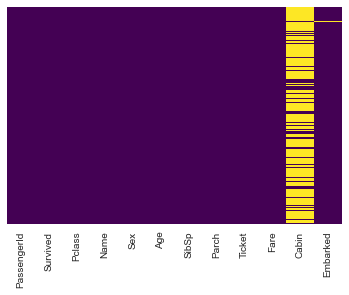

In [233]:
df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age, axis=1)
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Age: Missing Values abgeschlossen
### Cabin:
### Embarked:

In [234]:
df_train['Cabin'].isnull().sum()/len(df_train['Cabin'])

0.7710437710437711

### 77% fehlende Werte, Feature'Cabin' entfernen

In [235]:
df_train.drop('Cabin', axis=1, inplace=True)

In [236]:
df_train.head()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [237]:
df_train.dropna(inplace=True)

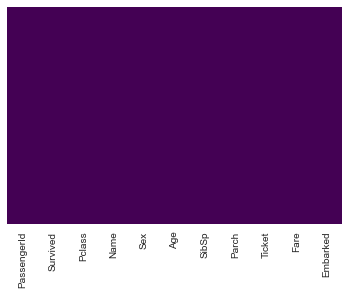

In [238]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [239]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


## Kategorische Daten konvertieren

#### Konvertieren der kategorischen Variablen in numerische "Dummy Variablen", um den Machine Learning Algorithmus anzuwenden

In [240]:
pd.get_dummies(df_train['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [241]:
sex = pd.get_dummies(df_train['Sex'], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [242]:
embark = pd.get_dummies(df_train['Embarked'], drop_first=True)

In [243]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [244]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [245]:
df_train.drop('Sex Name Ticket Embarked'.split(), axis=1, inplace=True)

In [246]:
df_train = pd.concat([df_train,sex,embark], axis=1)

In [247]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Logistische Regression

### Train Test Split

In [249]:
df_train.drop('Survived', axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [250]:
df_train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [255]:
from sklearn.model_selection import train_test_split

In [256]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Survived', axis=1), 
                                                    df_train['Survived'], test_size=0.30,
                                                    random_state=101)

## Trainieren und Vorhersage (Training and Predicting) Logisitic Regression

In [257]:
from sklearn.linear_model import LogisticRegression

In [258]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\mouni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [259]:
predicitions = logmodel.predict(X_test)

In [260]:
from sklearn.metrics import confusion_matrix

In [261]:
accuracy = confusion_matrix(y_test, predicitions)

In [262]:
accuracy

array([[149,  14],
       [ 39,  65]], dtype=int64)

In [263]:
from sklearn.metrics import accuracy_score

In [264]:
accuracy=accuracy_score(y_test,predicitions)
accuracy

0.8014981273408239

In [266]:
predicitions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

# Genauigkeit: 80.15%